# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("NFL_Play_by_Play_2009-2016_(v3).csv")

In [6]:
np.random.seed(0)

In [7]:
missing_value=df.isnull().sum()

In [9]:
missing_value[0:10] ## ilk 10 sutün

Date               0
GameID             0
Drive              0
qtr                0
down            5009
time              25
TimeUnder          0
TimeSecs          25
PlayTimeDiff      50
SideofField       46
dtype: int64

In [10]:
## ne kadar veri yok
total=np.product(df.shape)

In [12]:
total_missing=missing_value.sum()

In [17]:
## oran
percent_missing=(total_missing/total)*100
print("oran:  ",percent_missing)

oran:   24.97175720243778


In [18]:
missing_value[0:10]

Date               0
GameID             0
Drive              0
qtr                0
down            5009
time              25
TimeUnder          0
TimeSecs          25
PlayTimeDiff      50
SideofField       46
dtype: int64

In [19]:
df.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [20]:
column_na=df.dropna(axis=1)
column_na.head(5)

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,desc,PlayAttempted,Yards.Gained,...,RushAttempt,Receiver_ID,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,HomeTeam,AwayTeam
0,2009-09-10,2009091000,1,1,15,0,0,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,...,0,None,0,0,0,0,0,0,PIT,TEN
1,2009-09-10,2009091000,1,1,15,10,5,(14:53) B.Roethlisberger pass short left to H....,1,5,...,0,00-0017162,1,0,0,0,0,0,PIT,TEN
2,2009-09-10,2009091000,1,1,15,5,2,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,...,1,None,0,0,0,0,0,0,PIT,TEN
3,2009-09-10,2009091000,1,1,14,8,2,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,...,0,00-0026901,0,0,0,0,0,0,PIT,TEN
4,2009-09-10,2009091000,1,1,14,8,2,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,...,0,None,0,0,0,0,0,0,PIT,TEN


In [21]:
## veri kaybı
print("En bastaki data:  %d \n " %df.shape[1])
print("NA verileri silindiğinde %d" %column_na.shape[1])

En bastaki data:  102 
 
NA verileri silindiğinde 32


In [23]:
## otamatik olarak dolduralım
## küçük veri seti alalım

In [25]:
subset_df= df.loc[:, 'EPA':'Season'].head()
subset_df

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009.0


In [27]:
#  NAların yerine  0 koyabiliriz
subset_df.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009.0


In [30]:
## verilerin ortalamasını alarak dataları yerine doldurma
# NA değerlerini ortalama değerle dolduruyoruz
subset_df.fillna(df.mean(), inplace=True)
subset_df

<ipython-input-30-7ac8b08aab4b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  subset_df.fillna(df.mean(), inplace=True)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.499586,-0.392855,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.014477,-0.010469,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,0.499586,-0.392855,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.014477,-0.010469,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.499586,-0.392855,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.014477,-0.010469,2009.0


In [32]:
# 2.YÖNTEM önceki dataları yerine koyarak doldurma
subset_df2= df.loc[:, 'EPA':'Season'].head()
subset_df2
subset_df2.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009.0


In [34]:
## eğer string deger olsaydı
for column in df.select_dtypes(include=['object']).columns:
    mode_value = df[column].mode()[0]  # En sık geçen değeri alıyoruz
    df[column].fillna(mode_value, inplace=True)
# print df

In [35]:
## NORMALİZASYON
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

In [36]:
## RANDOM VERİ OLUŞTUR
original_data = np.random.exponential(size=1000)

In [37]:
olceklendirilmis_data= minmax_scaling(original_data, columns=[0])

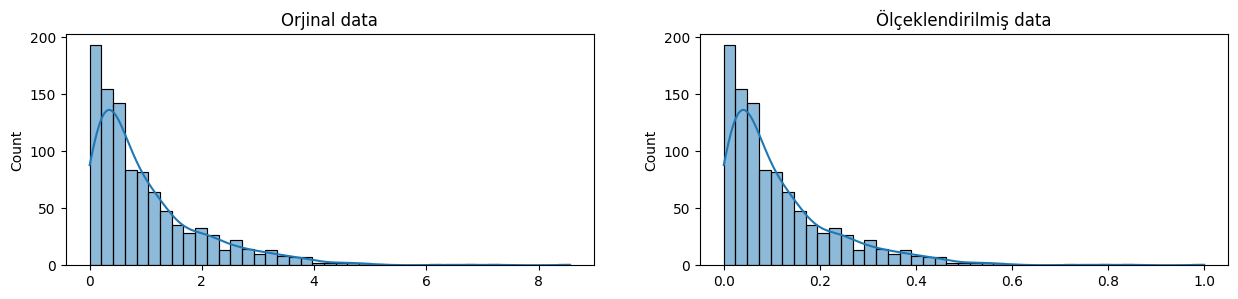

In [39]:
fig,ax=plt.subplots(1,2, figsize=(15,3))
sns.histplot(original_data,ax=ax[0], kde=True, legend=False)
ax[0].set_title("Orjinal data")
sns.histplot(olceklendirilmis_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Ölçeklendirilmiş data")
plt.show()

In [40]:
normalized_data = stats.boxcox(original_data)

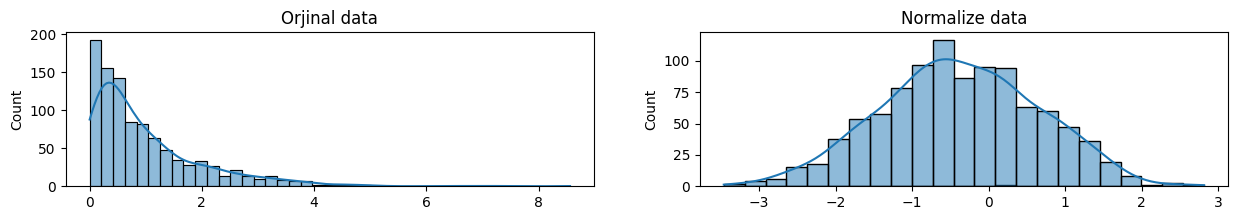

In [42]:
fig,ax=plt.subplots(1,2, figsize=(15,2))
sns.histplot(original_data,ax=ax[0],kde=True,legend=False)
ax[0].set_title("Orjinal data")
sns.histplot(normalized_data,ax=ax[1],kde=True,legend=False)
ax[1].set_title("Normalize data")
plt.show()

In [44]:
df_catalog=pd.read_csv("catalog.csv")

In [45]:
import datetime

In [46]:
np.random.seed(0)

In [48]:
df_catalog.head(1)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html


In [49]:
print(df_catalog['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [50]:
df_catalog['date'].dtype
##verinin date mi yoksa string mi olduğunu anlamaya çalışıyorum

dtype('O')

In [52]:
## yeni sutün oluşturma
df_catalog['date_Duzen'] = pd.to_datetime(df_catalog['date'], format="%m/%d/%y")

In [54]:
df_catalog['date_Duzen'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_Duzen, dtype: datetime64[ns]

In [55]:
## birden fazla date formatı olsaydı df_catalog['date_Duzen'] = pd.to_datetime(df_catalog['Date'], infer_datetime_format=True)

In [57]:
gun=df_catalog["date_Duzen"].dt.day
print(gun)

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_Duzen, Length: 1693, dtype: float64


In [58]:
#na verileri silme işlemi

In [59]:
gun=gun.dropna()

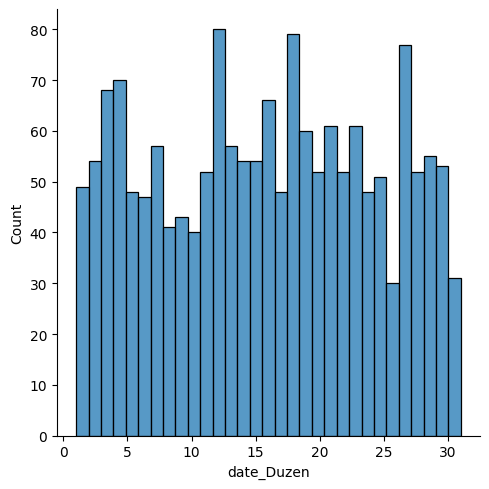

In [60]:
sns.displot(gun,kde=False,bins=31)

In [61]:
## özel sembolleri düzenleme

In [62]:
import charset_normalizer

np.random.seed(0)

In [64]:
before = "This is the euro symbol: €"
#konrtol
type(before)

str

In [65]:
after=before.encode("utf-8",errors="replace")
type(after)

bytes

In [66]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [67]:
print(after.decode("utf-8"))

This is the euro symbol: €


In [70]:
## ascii formatı
## print(after.decode("ascii"))

In [69]:
## yapılmıyormuş

In [71]:
after = before.encode("ascii", errors = "replace")

# utf-8 formatına
print(after.decode("ascii"))

This is the euro symbol: ?


In [18]:
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer


In [20]:

!pip install chardet

In [22]:


try:
    kickstarter_2016 = pd.read_csv("ks-projects-201801-utf8.csv", encoding='Windows-1252')
except UnicodeDecodeError:
    print("Error: Unable to read the file with Windows-1252 encoding.")


Error: Unable to read the file with Windows-1252 encoding.


In [25]:
## sembolleri utf-8 formatına getirir kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")

In [28]:
!pip install fuzzywuzzy


In [29]:
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [31]:
profesorler = pd.read_csv("pakistan_intellectual_capital.csv")

In [32]:
profesorler.head(1)

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN


In [33]:
## tutarsızlılık kontrolü

In [35]:
sehirler=profesorler["Country"].unique()

In [37]:
sehirler.sort()
sehirler

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

In [39]:
profesorler["Country"]=profesorler["Country"].str.lower()
profesorler["Country"]=profesorler["Country"].str.strip()

In [40]:
## tutarsız veriler

In [41]:
sehirler=profesorler["Country"].unique()
sehirler.sort()
sehirler

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

In [42]:
## birbirine yakın olan veri kontrolü southkorean south korea gibi

In [43]:
matches = fuzzywuzzy.process.extract("south korea", sehirler, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

In [44]:
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

In [45]:
##sütunundaki satırları değiştirme işlevi ve eşleşen verileri bulmak

In [50]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
   string=df[column].unique()

   matches=fuzzywuzzy.process.extract(string_to_match,string,limit=10,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
   #ratio > 90
   yakin_matches=[matches[0] for matches in matches if matches[1] >= min_ratio]
   ##yakin olanlari topla
   rows_matches=df[column].isin(yakin_matches)
   ## yakin olanları degistir
   df.loc[rows_matches,column]=string_to_match
   print("BITTI")

In [51]:
replace_matches_in_column(df=profesorler,column="Country",string_to_match="south korea")

BITTI


In [52]:
#kontrol edelimm!

In [53]:
countries = profesorler['Country'].unique()
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)